In [2]:
# NLP Processing
# In this script we will process the text reviews for the ski centers.  Here we will
# organize the corpus to be grouped by the ski centers.  There are a total of 289 
# ski centers.  So there will 289 documents.  All the reviews for a given ski center
# will be grouped to that ski center.

# The text will be pre-processed to lower case, remove stop words, remove any numbers
# and remove punctuation and lemmatize.

# The most frenquently words for each ski center will be determined.

# And TFIDF will be used to remove the 'stop words' common to these corpus.  And there 
# will be more relevant frequently used reviews.

import pandas as pd

#  Read in the data set with the text reviews 
reviews = pd.read_csv ('OnTheSnow_SkiAreaReviews.csv')

#  Give the data set friendly column names 
reviews.columns = ['placeholder','state','ski_area','reviewer_name','review_date',
                        'review_stars','review_text']


Here are the ski centers with the top ratings:
(Also provided is the number of reveiws.)

                              review_stars      
                                      mean count
ski_area                                        
blacktail-mountain-ski-area            4.8    24
blackjack-ski-resort                   4.8    26
mad-river-glen                         4.8    34
ski-brule                              4.8  1315
magic-mountain                         4.8    38
christie-mountain                      4.8    21
wildcat-mountain                       4.7    37
norway-mountain                        4.7    24
royal-mountain-ski-area                4.7    16
anthony-lakes-mountain-resort          4.7    22


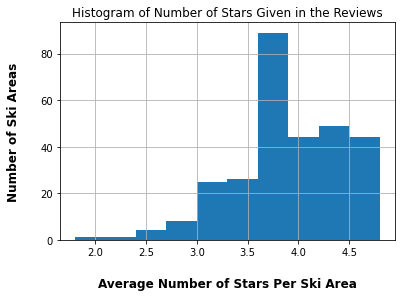

In [7]:
#  Here we calculate the average number of stars.  And find the ski centers with the
#  most number of stars.

#  aggregate the ski centers by average number of stars for their reviews 
#  and count the number of reviews per ski center
ski_areas_stars = reviews.groupby(['ski_area']).agg({'review_stars':['mean','count']})
ski_areas_stars = ski_areas_stars.sort_values(by=[('review_stars',  'mean')],ascending=False)

#  round the average number of stars to one decimal point
ski_areas_stars[('review_stars',  'mean')] = ski_areas_stars[('review_stars',  'mean')].round(1)

#  Print out a table with the best ski center ratings
print("\nHere are the ski centers with the top ratings:")
print("(Also provided is the number of reveiws.)\n")
print(ski_areas_stars.head(10))


#  This code creates a histogram of the number of stars for the reviews
alt = ski_areas_stars[('review_stars',  'mean')].hist(bins=10)
alt.set_xlabel("Average Number of Stars Per Ski Area", labelpad=20, weight='bold', size=12)
alt.set_ylabel("Number of Ski Areas", labelpad=20, weight='bold', size=12)
alt.set_title("Histogram of Number of Stars Given in the Reviews")

#  Create a list of the ski centers ordered by best ratings.
#  This list will be used later on to group the corpus by ski center
ski_areas = ski_areas_stars


In [4]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np



# Instantiate the WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

def get_clean_review(df):
    clean_review = []
    for index, row in df.iterrows():
        review_str = str(row['review_text'])
        # split the string into a list of words
        tokens = word_tokenize(review_str)
        lower_tokens = [t.lower() for t in tokens]

        # removes anything not alpha characters such as punctuation and numbers
        alpha_only = [t for t in lower_tokens if t.isalpha()]

        # removes the stop words from the text
        no_stops = [t for t in alpha_only if t not in stopwords.words('english')]

        # Lemmatize all tokens into a new list: lemmatized
        lemmatized = [wordnet_lemmatizer.lemmatize(t) for t in no_stops]

        # make a list of lists
        for w in lemmatized:
            clean_review.append(w)
        
    return clean_review

reviews_ski_area = []

for sa in ski_areas.index:
    reviews_to_pass= reviews[reviews['ski_area']==sa]
    print("Processing:",sa, "there are",len(reviews_to_pass),"reviews to process")
    reviews_ski_area.append( get_clean_review(reviews_to_pass))


Processing: blacktail-mountain-ski-area there are 24 reviews to process
Processing: blackjack-ski-resort there are 26 reviews to process
Processing: mad-river-glen there are 34 reviews to process
Processing: ski-brule there are 1315 reviews to process
Processing: magic-mountain there are 38 reviews to process
Processing: christie-mountain there are 21 reviews to process
Processing: wildcat-mountain there are 37 reviews to process
Processing: norway-mountain there are 24 reviews to process
Processing: royal-mountain-ski-area there are 16 reviews to process
Processing: anthony-lakes-mountain-resort there are 22 reviews to process
Processing: holimont-ski-area there are 18 reviews to process
Processing: brundage-mountain-resort there are 33 reviews to process
Processing: mccauley-mountain-ski-center there are 20 reviews to process
Processing: beaver-mountain there are 25 reviews to process
Processing: eaglecrest-ski-area there are 19 reviews to process
Processing: lost-trail-powder-mtn th

Processing: schweitzer there are 71 reviews to process
Processing: dodge-ridge there are 68 reviews to process
Processing: spirit-mountain there are 40 reviews to process
Processing: sunday-river there are 94 reviews to process
Processing: solitude-mountain-resort there are 82 reviews to process
Processing: snow-king-resort there are 15 reviews to process
Processing: bogus-basin there are 58 reviews to process
Processing: tamarack-resort there are 55 reviews to process
Processing: brandywine there are 39 reviews to process
Processing: appalachian-ski-mtn there are 48 reviews to process
Processing: stowe-mountain-resort there are 106 reviews to process
Processing: jiminy-peak there are 80 reviews to process
Processing: boston-mills there are 45 reviews to process
Processing: belleayre there are 89 reviews to process
Processing: alpental there are 54 reviews to process
Processing: timberline-lodge there are 42 reviews to process
Processing: snow-valley there are 61 reviews to process
Pro

Processing: soda-springs there are 25 reviews to process
Processing: cannonsburg there are 68 reviews to process
Processing: the-summit-at-snoqualmie there are 53 reviews to process
Processing: bradford-ski-area there are 14 reviews to process
Processing: spring-mountain-ski-area there are 63 reviews to process
Processing: camelback-mountain-resort there are 146 reviews to process
Processing: big-bear there are 35 reviews to process
Processing: winterplace-ski-resort there are 58 reviews to process
Processing: mount-la-crosse there are 23 reviews to process
Processing: villa-olivia there are 31 reviews to process
Processing: ski-apache there are 172 reviews to process
Processing: las-vegas-ski-and-snowboard-resort there are 54 reviews to process
Processing: hyland-ski-snowboard-area there are 27 reviews to process
Processing: woodbury-ski-area there are 22 reviews to process
Processing: sandia-peak there are 33 reviews to process
Processing: sugar-mountain-resort there are 129 reviews 

In [12]:
from gensim.corpora.dictionary import Dictionary

# Create a Dictionary from the articles: dictionary
dictionary_ski_area = Dictionary(reviews_ski_area)

# Create a MmCorpus: corpus
corpus_ski_areas = [dictionary_ski_area.doc2bow(r) for r in reviews_ski_area]


In [13]:
#  Here we organize the words into most frequently used words by ski center.
#  The weights of the words are just number of times that they appeared.

from collections import defaultdict
import itertools

count =0 

for doc in  corpus_ski_areas:
    print("\nHere are the frequent words from",ski_areas.index[count],"\n")
    count +=1
    # Sort the doc for frequency: bow_doc
    bow_doc = sorted(doc, key=lambda w: w[1], reverse=True)

    # Print the top 5 words of the document alongside the count
    for word_id, word_count in bow_doc[:5]:
        print(dictionary_ski_area.get(word_id), word_count)

    # Create the defaultdict: total_word_count
    total_word_count = defaultdict(int)
    for word_id, word_count in itertools.chain.from_iterable(corpus_ski_areas):
        total_word_count[word_id] += word_count
    

#  These are the frequent words from each ski center.  It is clear that the name 
#  of the ski center is usually one of the most frequent words.  It is also clear
#  that there are stop words that are common to this corpus.  These words will be 
#  given less weight in the next step (TFIDF analysis)


Here are the frequent words from blacktail-mountain-ski-area 

great 31
mountain 20
blacktail 17
resort 15
ski 15

Here are the frequent words from blackjack-ski-resort 

great 31
blackjack 26
ski 20
hill 17
time 17

Here are the frequent words from mad-river-glen 

ski 37
skiing 31
one 28
snow 27
trail 27

Here are the frequent words from ski-brule 

great 820
ski 757
brule 524
family 442
friendly 390

Here are the frequent words from magic-mountain 

magic 65
mountain 56
ski 34
great 29
place 25

Here are the frequent words from christie-mountain 

great 29
park 19
run 18
ski 18
terrain 17

Here are the frequent words from wildcat-mountain 

mountain 49
wildcat 41
trail 34
great 28
ski 28

Here are the frequent words from norway-mountain 

great 31
hill 31
place 19
ski 19
kid 16

Here are the frequent words from royal-mountain-ski-area 

mountain 21
great 10
family 9
place 7
fun 6

Here are the frequent words from anthony-lakes-mountain-resort 

resort 16
good 15
lift 15
run 15
grea

Here are the frequent words from snowy-range-ski-recreation-area 

day 46
ski 45
great 40
snowy 32
place 30

Here are the frequent words from pomerelle-mountain-resort 

great 39
pomerelle 27
resort 24
snow 21
ski 19

Here are the frequent words from cranmore-mountain-resort 

mountain 28
trail 23
great 22
cranmore 22
skiing 15

Here are the frequent words from steamboat 

steamboat 194
mountain 122
ski 108
skiing 104
great 100

Here are the frequent words from crystal-mountain 

resort 37
great 33
crystal 33
run 28
ski 24

Here are the frequent words from lookout-pass-ski-area 

lookout 76
ski 54
great 34
mountain 33
resort 29

Here are the frequent words from ski-cooper 

ski 45
day 32
cooper 27
great 26
mountain 23

Here are the frequent words from diamond-peak 

great 35
run 35
diamond 32
peak 29
view 21

Here are the frequent words from pajarito-mountain-ski-area 

run 37
great 36
lift 36
mountain 30
ski 30

Here are the frequent words from ski-sawmill 

ski 34
sawmill 21
lesson 1


Here are the frequent words from pico-mountain-at-killington 

pico 65
killington 53
ski 43
day 39
mountain 37

Here are the frequent words from bittersweet-ski-area 

lift 40
bittersweet 36
area 31
run 29
resort 27

Here are the frequent words from nordic-mountain 

great 19
good 18
hill 17
place 16
run 13

Here are the frequent words from durango-mountain-resort 

mountain 105
durango 86
lift 81
ski 77
great 76

Here are the frequent words from okemo-mountain-resort 

okemo 178
mountain 155
trail 125
lift 121
ski 92

Here are the frequent words from willamette-pass 

pas 80
willamette 75
lift 73
ski 54
get 53

Here are the frequent words from mad-river-mountain 

park 73
mad 72
river 70
ohio 53
place 45

Here are the frequent words from stratton-mountain 

stratton 182
mountain 154
lift 112
trail 106
ski 88

Here are the frequent words from song-mountain 

song 19
trail 18
great 17
good 14
area 13

Here are the frequent words from berkshire-east 

berkshire 34
east 33
mountain 26
sk


Here are the frequent words from hidden-valley-ski-area 

place 34
ski 28
snow 24
skiing 22
year 20

Here are the frequent words from timberline-four-seasons 

lift 86
timberline 77
resort 67
mountain 66
trail 66

Here are the frequent words from hunter-mountain 

hunter 185
mountain 144
snow 103
trail 101
ski 86

Here are the frequent words from liberty 

liberty 83
lift 66
ski 62
snow 59
mountain 58

Here are the frequent words from cooper-spur 

cooper 19
spur 18
ski 17
kid 15
would 15

Here are the frequent words from 49-degrees-north 

ski 51
lift 39
mountain 38
snow 36
would 35

Here are the frequent words from mountain-high 

resort 68
get 67
mountain 67
snow 66
time 62

Here are the frequent words from snow-creek 

good 32
park 32
snow 25
place 18
run 18

Here are the frequent words from soda-springs 

kid 35
lift 30
one 30
tube 24
staff 23

Here are the frequent words from cannonsburg 

ski 62
cannonsburg 55
place 50
lift 47
get 37

Here are the frequent words from the-summit

In [50]:
#  Here we perform TFIDF analysis based on the ski resorts. 
#  This takes a few seconds to process.

from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(corpus_ski_areas)

# Calculate the tfidf weights of doc: tfidf_weights
print("\nTFIDF Analysis by Ski Resort:\n")
counter = 0
for doc in corpus_ski_areas:
    tfidf_weights = tfidf[doc]
    
    print('\n',ski_areas.index.values[counter]," key words and relative weights are:\n")
    counter +=1
    
    # Sort the weights from highest to lowest: sorted_tfidf_weights
    sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

    # Print the top 5 weighted words
    for term_id, weight in sorted_tfidf_weights[:5]:
        print(dictionary_ski_area.get(term_id), round(weight,3))

        
#  Here the name of ski center is often the most common words.  Also some trail names appear.
#  And some key ski center features also appear.  The lists are much more relevant by using
#  TFIDF.


TFIDF Analysis by Ski Resort:


 blacktail-mountain-ski-area  key words and relative weights are:

blacktail 0.807
flathead 0.474
fog 0.123
whitefish 0.081
exhange 0.059

 blackjack-ski-resort  key words and relative weights are:

blackjack 0.754
fantasticly 0.189
tohoe 0.189
mighty 0.129
anyplace 0.112

 mad-river-glen  key words and relative weights are:

mrg 0.678
glen 0.236
mad 0.23
antelope 0.219
river 0.169

 ski-brule  key words and relative weights are:

brule 0.963
homestead 0.204
bbq 0.07
skiwee 0.031
carload 0.027

 magic-mountain  key words and relative weights are:

magic 0.609
vermont 0.237
okemo 0.203
bromley 0.166
stratton 0.127

 christie-mountain  key words and relative weights are:

christie 0.759
diffiulty 0.155
pressured 0.155
traisl 0.155
terain 0.114

 wildcat-mountain  key words and relative weights are:

wildcat 0.805
polecat 0.192
washington 0.128
pinkham 0.115
cheetah 0.101

 norway-mountain  key words and relative weights are:

norway 0.583
fried 0.161
fish

 pine-mountain  key words and relative weights are:

pine 0.696
famers 0.148
condo 0.109
birthday 0.106
brule 0.101

 coffee-mill-ski-snowboard-resort  key words and relative weights are:

mill 0.355
coffee 0.255
cushioning 0.21
hangar 0.21
octangular 0.21

 beaver-creek  key words and relative weights are:

beaver 0.569
creek 0.335
grouse 0.283
avon 0.279
bc 0.255

 gore-mountain  key words and relative weights are:

gore 0.879
burnt 0.129
saratoga 0.103
gondola 0.09
twister 0.077

 pine-knob-ski-resort  key words and relative weights are:

knob 0.309
shaboom 0.308
brighton 0.232
vert 0.219
pine 0.203

 sugarbush  key words and relative weights are:

sugarbush 0.722
ellen 0.369
castlerock 0.291
lincoln 0.226
organgrinder 0.078

 mohawk-mountain  key words and relative weights are:

mohawk 0.868
ct 0.202
sundown 0.137
liar 0.094
voucher 0.078

 black-mountain  key words and relative weights are:

passport 0.408
hampshire 0.239
dependent 0.169
aging 0.155
reselling 0.138

 mount-holly  

girdwood 0.177
ak 0.145

 waterville-valley  key words and relative weights are:

waterville 0.787
wv 0.189
bretten 0.128
schwendi 0.128
loon 0.106

 pico-mountain-at-killington  key words and relative weights are:

pico 0.882
killington 0.319
activated 0.079
representative 0.067
ka 0.06

 bittersweet-ski-area  key words and relative weights are:

bittersweet 0.796
timber 0.184
michigan 0.163
cannonsburg 0.161
timberridge 0.153

 nordic-mountain  key words and relative weights are:

nordic 0.572
footer 0.316
ahem 0.22
atomsphere 0.22
wisco 0.193

 durango-mountain-resort  key words and relative weights are:

durango 0.726
dmr 0.496
purgatory 0.295
purg 0.079
tamarron 0.06

 okemo-mountain-resort  key words and relative weights are:

okemo 0.874
gore 0.269
jackson 0.139
ludlow 0.123
killington 0.064

 willamette-pass  key words and relative weights are:

willamette 0.879
eugene 0.16
wp 0.115
oakridge 0.102
oregon 0.099

 mad-river-mountain  key words and relative weights are:

ohio 0.48

 spring-mountain-ski-area  key words and relative weights are:

spring 0.244
philadelphia 0.156
tubing 0.151
canopy 0.148
poconos 0.124

 camelback-mountain-resort  key words and relative weights are:

camelback 0.873
cb 0.187
poconos 0.069
chateau 0.067
misinformation 0.066

 big-bear  key words and relative weights are:

bear 0.562
woodloch 0.282
skying 0.16
allian 0.141
enoughparking 0.141

 winterplace-ski-resort  key words and relative weights are:

winterplace 0.883
youth 0.086
blower 0.08
beech 0.075
wintergreen 0.072

 mount-la-crosse  key words and relative weights are:

lacrosse 0.446
crosse 0.235
chalet 0.212
merrillan 0.178
midwest 0.169

 villa-olivia  key words and relative weights are:

bartlett 0.368
villa 0.357
olivia 0.343
cage 0.246
tow 0.187

 ski-apache  key words and relative weights are:

apache 0.872
ruidoso 0.288
gondola 0.109
capitan 0.096
texas 0.088

 las-vegas-ski-and-snowboard-resort  key words and relative weights are:

vega 0.736
charleston 0.272
lee 0.1

In [16]:
#  We normally ski at Belleayre.  Here we find the most frequently used words using TFIDF for Belleayre.
#  Here we see that Belleayre, Hunter and Windham are all mentioned.  These are the three ski centers in the
#  area which are all located next to each other.

#  Tomahawk and Superchief are two of the lifts which are new and of high quality.  Catskills is the name of 
#  mountain range where Belleayre is located.  And Discovery is the name of the lodge at the ski center.
from gensim.models.tfidfmodel import TfidfModel

#  Here we find the number of belleayre ski center in the list of ski centers
ski_areas_list = list(ski_areas.index)
df = ski_areas_list.index('belleayre')
print(ski_areas_list[df],"is position",df,"in the list of ski centers.")

#  here we pull out the weights for the correct ski center document

tfidf = TfidfModel(corpus_ski_areas)
tfidf_weights = tfidf[corpus_ski_areas[df]]

print('\n',ski_areas.index.values[df]," key words and relative weights are:\n")

# Sort the weights from highest to lowest: sorted_tfidf_weights
sorted_tfidf_weights = sorted(tfidf_weights, key=lambda w: w[1], reverse=True)

# print out the top words and weights for belleayre ski center
for term_id, weight in sorted_tfidf_weights[:10]:
    print(dictionary_ski_area.get(term_id), round(weight,3))

belleayre is position 147 in the list of ski centers.

 belleayre  key words and relative weights are:

belleayre 0.835
hunter 0.169
tomahawk 0.163
superchief 0.146
windham 0.122
catskills 0.103
nyc 0.08
consulting 0.073
discovery 0.069
boot 0.064
